In [ ]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import operator

# 到底目前有多少個被我記錄(背)下來了
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

print(createDataSet())

(array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]]), ['A', 'A', 'B', 'B'])


In [ ]:
# kNN
# 測試用資料：testdata
# 訓練集：dataSet
# 所有分類的標籤：labels
# k:k個鄰居
def classify(testdata, dataSet, labels, k):
	# 訓練集有多少資料
    dataSetSize = dataSet.shape[0]
    diffMat = tile(testdata, (dataSetSize,1)) - dataSet # 算testdata和dataSet間的曼哈頓距離

    distances = []
    for p in diffMat:     #分別取出四組 (x差, y差)
      distances.append(abs(p[0]) + abs(p[1])) #p[0]就是x差, p[1]是y差, 兩個都取絕對值後相加, 再加入 distances 的List
    distances = np.array(distances)

    #
    #sqDiffMat = diffMat**2
    #
    #sqDistances = sqDiffMat.sum(axis=1)
    #
    #distances = sqDistances**0.5

    print(distances)

    # 根據距離排序，排序結果就是index
    sortedDistIndicies = distances.argsort()
    print(sortedDistIndicies)

    classCount={}     
    # 取得k當參考         
    for i in range(k):  # i = 0~(k-1)  	  
    	# 根據前面排序得知對應的類別
        voteIlabel = labels[sortedDistIndicies[i]]  #求出究竟是A還是B
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #針對是A還是B, 就加一
  
    print(classCount)

    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # 丟回最高一項
    return sortedClassCount[0][0]

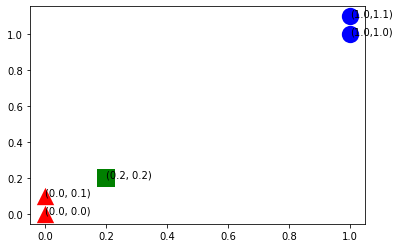

[1.7 1.6 0.4 0.3]
[3 2 1 0]
{'B': 2, 'A': 1}
B


In [ ]:
k=3
testdata=[0.2,0.2]
dataSet,labels = createDataSet()

fig = plt.figure()
ax = fig.add_subplot(111)
indx = 0 
for point in dataSet:
	if labels[indx] == 'A' :
		ax.scatter(point[0],point[1],c='blue',marker='o',linewidths=0, s=300)
		plt.annotate("("+str(point[0])+","+str(point[1])+")",xy = (point[0],point[1]))
	else:
		ax.scatter(point[0],point[1],c='red',marker='^',linewidths=0, s=300)
		plt.annotate("("+str(point[0])+", "+str(point[1])+")",xy = (point[0],point[1]))	
	indx += 1

ax.scatter(testdata[0],testdata[1],c='green',marker='s',linewidths=0, s=300)
plt.annotate("("+str(testdata[0])+", "+str(testdata[1])+")",xy = (testdata[0],testdata[1]))		

plt.show()
print(classify(testdata, dataSet, labels, k))